<a href="https://colab.research.google.com/github/tramyynt/COVID-19-impact-on-Digital-Learning-/blob/main/Covid_19_Impact_on_Digital_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Covid Impact on Digital Learning**:
This notebook is to uncover some trends in digital learning.

### **Problem Statement**
The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

### **What should focus on ?**


1.   What is the picture of digital connectivity and engagement in 2020?
2.   What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
3. How does student engagement with different types of education technology change over the course of the pandemic?
4. How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
5. Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?






## Data Preparation


1.   Import neccessary libs
2.   Get data from Kaggle API 



In [9]:
import numpy as np 
import pandas as pd

import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
!pip install -U -q kaggle==1.5.8

In [3]:
!ls -la /root

total 60
drwx------ 1 root root 4096 Sep  3 20:38 .
drwxr-xr-x 1 root root 4096 Sep  3 20:38 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Sep  3 20:39 .cache
drwxr-xr-x 1 root root 4096 Sep  2 13:19 .config
drwxr-xr-x 3 root root 4096 Sep  1 19:26 .gsutil
drwxr-xr-x 5 root root 4096 Sep  2 13:19 .ipython
drwx------ 2 root root 4096 Sep  2 13:19 .jupyter
drwxr-xr-x 2 root root 4096 Sep  3 20:38 .keras
drwx------ 1 root root 4096 Sep  2 13:19 .local
drwxr-xr-x 4 root root 4096 Sep  2 13:19 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


In [12]:
# MUST UPLOAD kaggle.json FIRST
# move kaggle.json to /root/.kaggle
!mv /content/kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c "learnplatform-covid19-impact-on-digital-learning" 

 97% 120M/124M [00:00<00:00, 209MB/s] 
100% 124M/124M [00:00<00:00, 197MB/s]


In [14]:
# unzip data
!unzip '*.zip'

Archive:  learnplatform-covid19-impact-on-digital-learning.zip
  inflating: README.md               
  inflating: districts_info.csv      
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: engagement_data/1470.csv  
  inflating: engagement_data/1536.csv  
  inflating: engagement_data/1549.csv  
  inflating: engagement_data/1558.csv  
  inflating: engagement_data/1570.csv  
  inflating: engagement_data/1584.csv  
  inflating: engagement_data/1624.csv  
  inflating: engagement_data/1705.csv  
  inflating: engagement_data/1712.csv  
  inflating: engageme

In [15]:
# get file name and assign to a new column district_id
files = glob.glob("engagement_data/*.csv")
list_of_df = [pd.read_csv(file).assign(district_id=os.path.basename(file).strip(".csv")) for file in files] 
#list_of_df = [pd.read_csv(file) for file in files]

In [16]:
engagement = pd.concat(list_of_df, ignore_index= True)

In [ ]:
engagement.shape

In [ ]:
engagement.head(5)

In [17]:
districts = pd.read_csv("districts_info.csv")
products = pd.read_csv("products_info.csv")

In [ ]:
print(districts.shape)
print(products.shape)

In [ ]:
districts.head(5)

In [ ]:
products.head(5)

## Data cleaning and Preprocessing


1.   Work with missing values
2.   Get dummies sectors 




In [ ]:
print(districts.info())
print(engagement.info())
print(products.info())

In [18]:
#work with missing values in districts
districts.isnull().sum()/len(districts)
districts = districts[districts.state.notna()].reset_index(drop=True)

In [19]:
# convert datetime type, district_id to int64 (same as districts)
engagement['time'] = pd.to_datetime(engagement['time'])
engagement['district_id']= engagement['district_id'].astype(str).astype(int)

In [20]:
# get dummies sector for products.
sectors = products['Sector(s)'].str.get_dummies(sep="; ")
sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in sectors.columns]
products = products.join(sectors)
products.drop("Sector(s)", axis=1, inplace=True)

del sectors

## **Exploratory Data Analysis**

### 1. Districts
The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.


In [ ]:
districts.tail(5)

**Number of school districts per state**

In [21]:
districts_by_state = districts['state'].value_counts().to_frame().reset_index(drop=False)
districts_by_state.columns = ['state','count_districts']
districts_by_state

,state,count_districts
0,Connecticut,30
1,Utah,29
2,Massachusetts,21
3,Illinois,18
4,California,12
5,Ohio,11
6,New York,8
7,Indiana,7
8,Missouri,6
9,Washington,6


In [22]:
#using built-in United States Choropleth Map
us_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
districts_by_state['state_abbrev'] = districts_by_state['state'].replace(us_state) #https://stackoverflow.com/questions/40075106/replace-values-in-pandas-series-with-dictionary
fig = go.Figure()
layout = dict(
    title_text = "Number of School Districts per State",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=districts_by_state.state_abbrev,
        zmax=1,
        z = districts_by_state.count_districts,
        locationmode = 'USA-states',
        marker_line_color='white',
        geo='geo',
        colorscale = 'Reds', 
    )
)
            
fig.update_layout(layout)   
fig.show()


 As you can see in above plot, the available data does not cover all the states in the U.S. (19/50). The states with the most available school districts are CT (30) and UT (29) while there are also states with only one school district (FL, TN, NY, AZ).

### **School districts per locale**

In [29]:
districts.pp_total_raw.unique()
temp = districts.groupby('locale').pp_total_raw.value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop=False)

In [30]:
temp = temp.pivot(index='locale', columns='pp_total_raw')['amount']

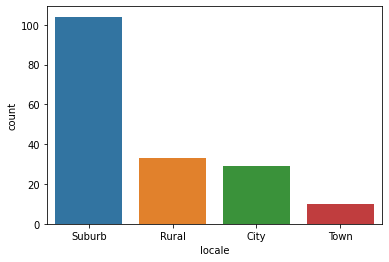

In [25]:
sns.countplot(x="locale", data=districts)
plt.show()

In [26]:
temp = temp[['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ]]

In [31]:
temp

pp_total_raw,"[10000, 12000[","[12000, 14000[","[14000, 16000[","[16000, 18000[","[18000, 20000[","[20000, 22000[","[22000, 24000[","[32000, 34000[","[4000, 6000[","[6000, 8000[","[8000, 10000["
locale,,,,,,,,,,,
City,2.0,2.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0,7.0
Rural,2.0,3.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,1.0,6.0
Suburb,9.0,10.0,14.0,10.0,3.0,1.0,1.0,NaN,2.0,11.0,12.0
Town,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


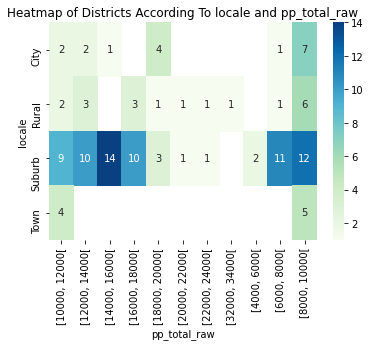

In [34]:
sns.heatmap(temp, annot=True,  cmap='GnBu').set_title('Heatmap of Districts According To locale and pp_total_raw')
plt.show()